# 1. Problema de la mochila

Se tiene una mochila con peso máximo $W$ y distintos elementos de distinto peso y valor. Se debe escoger la combinación de objetos que quepan en la mochila que maximicen el valor total.

**Entrada**: arreglo de pesos, de valores, el valor del peso máximo de la mochila y la cantidad de elementos.

**Salida**: valor maximizado

## 1.1. Descripción del algoritmo Bottom-Up

In [1]:
def knapSackDin(W, wt, val, n, verbose=False):
    c = 0
    K = [[0 for x in range(W + 1)] for x in range(n + 1)]
 
    # Se construye la tabla K
    for i in range(n + 1):
        for w in range(W + 1):
            if (i == 0) or (w == 0):
                K[i][w] = 0
            elif wt[i-1] <= w:
                K[i][w] = max(val[i-1] + K[i-1][w-wt[i-1]], K[i-1][w])
            else:
                K[i][w] = K[i-1][w]
            c += 1
        if verbose:
            print(f'Iteración {i+1}')
            print(f'Valor dentro de la mochila: {K[i][w]}\n')
 
    return K[n][W], c

In [2]:
val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)
print(f'Valor máximo posible: {knapSackDin(W, wt, val, n)[0]}')

Valor máximo posible: 220


# 2. Algoritmo _greedy_

In [3]:
class Item:
    def __init__(self, value, weight):
        self.value = value
        self.weight = weight

In [4]:
def fractionalKnapsack(W, arr, verbose=False):
    c = 0
 
    # Se ordenan los elementos según su ratio
    arr.sort(key=lambda x: (x.value/x.weight), reverse=True)

    if verbose:
        print("Elementos ordenados por ratio 'valor/peso':")
        for item in arr:
            print(item.value, item.weight, item.value/item.weight)
        print()
 
    # Valor total optimizado
    finalValue = 0.0

    for item in arr:
 
        # Se agrega un elemento si no sobrepasa el peso máximo
        if item.weight <= W:
            W -= item.weight
            finalValue += item.value
            if verbose:
                print(f'Se agregó un elemento completo: {item.weight}')
                print(f'Valor total dentro de la mochila: {finalValue}')
            c += 1

        # Si no se puede agregar el elemento completo se agrega una fracción de él
        else:
            finalValue += item.value * W / item.weight
            c += 1
            if verbose:
                print(f'Se agregó {(item.value * W / item.weight)/item.value:.2f} del elemento de peso {item.weight} y valor {item.value}: {item.value * W / item.weight}\n')
            break

    return finalValue, c

In [5]:
W = 50
arr = [Item(60, 10), Item(100, 20), Item(120, 30)]
max_val, c = fractionalKnapsack(W, arr)
print(f'Valor máximo posible: {max_val}')
print(f'Comparaciones: {c}')

Valor máximo posible: 240.0
Comparaciones: 3


## 2.1. Descripción del algoritmo

# 3. Opción `verbose=True`

In [6]:
val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)
print(f'Valor máximo posible: {knapSackDin(W, wt, val, n, True)[0]}')

Iteración 1
Valor dentro de la mochila: 0

Iteración 2
Valor dentro de la mochila: 60

Iteración 3
Valor dentro de la mochila: 160

Iteración 4
Valor dentro de la mochila: 220

Valor máximo posible: 220


In [7]:
W = 50
arr = [Item(60, 10), Item(100, 20), Item(120, 30)]
max_val, _ = fractionalKnapsack(W, arr, True)
print (f'Valor máximo posible: {max_val}')

Elementos ordenados por ratio 'valor/peso':
60 10 6.0
100 20 5.0
120 30 4.0

Se agregó un elemento completo: 10
Valor total dentro de la mochila: 60.0
Se agregó un elemento completo: 20
Valor total dentro de la mochila: 160.0
Se agregó 0.67 del elemento de peso 30 y valor 120: 80.0

Valor máximo posible: 240.0


# 4. Correctitud

Hipótesis inductiva: _el algoritmo es correcto para todos los valores de $a[i', j']$, donde (i, j) < (i', j'). En otras palabras, todos los elementos previos de la tabla son correctos._

Caso base: $a[i, 0] = a[0, j] = 0$ para todo $i, j$.

Paso inductivo: cuando se calcula $a[i', j']$, por la hipótesis inductiva se tiene que $a[i'-1, j']$ y $a[i'-1, j'-w_{i'}]$ están correctamente calculados. El algoritmo considera el valor óptimo para el item $i'$ en la mochila como $a[i'-1, j'-w_{i'}]+v_{i'}$ y para el item $i'$ no en la mochila como $a[i'-1, j']$. Por lo tanto, el valor en $a[i', j']$ será correctamente calculado.

# 5. Tiempo de ejecución

## 5.1. Algoritmo Bottom-Up

El tiempo de ejecución de esta implementación es $O(N \cdot W)$, donde $N$ corresponde al número de elementos y $W$ a la capacidad. Por cada elemento de peso se recorren todas las capacidades.

## 5.2. Algoritmo _greedy_

El algoritmo tiene 2 pasos principales: ordenar los elementos y agregarlos a la mochila. El primero se puede hacer en $O(n \log n)$ y el segundo en $O(n)$, por lo que su complejidad total es $O(n \log n)$. Si los elementos ya están ordenados, el algoritmo solo tiene complejidad $O(n)$.

# 6. Experimentos

In [8]:
import datetime
import matplotlib.pyplot as plt
import random
from random import randint
from math import log
from timeit import repeat

%matplotlib inline

In [9]:
def generateItemsList(num_items, max_value_per_weight_ratio):
    values = list()
    weights = list()
    for i in range(0, num_items):
        value = random.randint(1, 4)
        max_w = int(max_value_per_weight_ratio/value)
        weight = random.randint(min(1, max_w), max_w)

        values.append(value)
        weights.append(weight)
    return values, weights

In [10]:
def generateItemsObjList(num_items, max_value_per_weight_ratio):
    items = list()
    for i in range(0, num_items):
        value = random.randint(1, 4)
        max_w = int(max_value_per_weight_ratio/value)
        weight = random.randint(min(1, max_w), max_w)

        items.append(Item(value, weight))
    return items

In [11]:
def generateItemsObj(num_items, max_value_per_weight_ratio, W):
    items = list()
    for i in range(0, num_items):
        value = random.randint(1, 4)
        max_w = int(max_value_per_weight_ratio/value)
        weight = random.randint(min(1, max_w), max_w)

        items.append(Item(value, weight))
    
    max_val, _ = fractionalKnapsack(W, items)
    return max_val

## 6.1. Comparación tiempos de ejecución

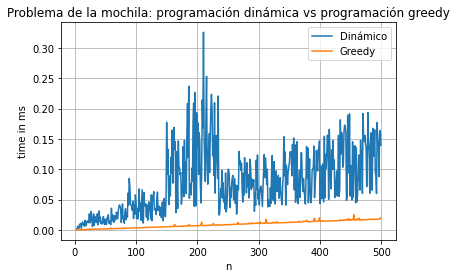

In [12]:
x = []
y = []

x2 = []
y2 = []

for n in range(3, 500):
    val, wt = generateItemsList(n, 2*n) # 2*n es el máximo ratio entre el valor y el peso
    W = random.randint(25, 100) # se genera un valor random para el peso
    t = repeat(setup="from __main__ import knapSackDin", stmt=f'knapSackDin({W}, {wt}, {val}, {len(val)}){[0]}', repeat=1, number=10)
    x.append(n)
    y.append(t)

for n2 in range(3, 500):
    W2 = random.randint(25, 100)
    t2 = repeat(setup="from __main__ import Item, generateItemsObj", stmt=f'generateItemsObj({n2}, {2*n2}, {W2})', repeat=1, number=10)
    x2.append(n2)
    y2.append(t2)

plt.plot(x, y)
plt.plot(x2, y2)
plt.legend(["Dinámico", "Greedy"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title("Problema de la mochila: programación dinámica vs programación greedy")

plt.grid()
plt.show()

El algoritmo dinámico es notoriamente más lento que el greedy para todos los valores de $n$. Cabe resaltar que el dinámico resuelve _0-1 Knapsack_ y el greedy resuelve _Fractional Knapsack_. Si el greedy resolviera _0-1 Knapsack_ seguiría siendo mucho más rápido, pero no encontraría siempre la solución óptima.

## 6.2. Comparación de iteraciones/repeticiones

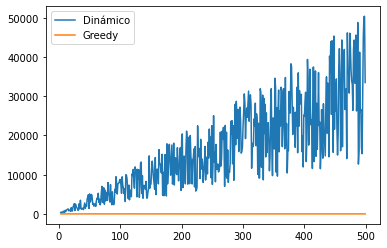

In [13]:
x = [n for n in range(3, 500)]
y1 = []
y2 = []

for n in range(3, 500):
    W = random.randint(25, 100)
    val, wt = generateItemsList(n, 2*n)
    _, c1 = knapSackDin(W, wt, val, len(val))
    items = generateItemsObjList(n, 2*n)
    _, c2 = fractionalKnapsack(W, items)
    y1.append(c1)
    y2.append(c2)

plt.plot(x, y1)
plt.plot(x, y2)

plt.legend(["Dinámico", "Greedy"])
plt.show()

Como se puede apreciar, la versión dinámica realiza muchas más comparaciones que la versión greedy para cualquier valor de $n$. Al igual que lo explicado en el gráfico anterior, se está comparando el algoritmo dinámico que resuelve _0-1 Knapsack_ con el greedy que resuelve _Fractional Knapsack_ y que si éste último resolviera _0-1 Knapsack_ no siempre encontraría la respuesta óptima, manteniendo la cantidad de comparaciones mucho más bajas que el dinámico.